## Homework 01 - Solutions
###  Math 4320 - Mathematical Modeling, Dr. Scott Cook, Tarleton State University, Fall 2017
### Due: Midnight, Tuesday, Sept 12, 2017

### Instructions
- Submit as email attachement(s) by the deadline to scook@tarleton.edu
- Problems marked "computer" are coding projects.  They must be done in a Jupyter Notebook and submitted as .ipynb file.
- Problem marked "concept" are traditional math homework problems to be worked out by hand.  They can be written either in the Jupyter Notebook as "markdown" cells (preferred) or neatly handwritten and scanned as .pdf.  See https://daringfireball.net/projects/markdown/basics).
- Submit Jupyter Notebooks in .ipynb format.  Files -> Download as -> .ipynb
- Submit handwritten work in .pdf format

1) (concept) For each of the following, please

    i. determine
        - (L) linear or (NL) non-linear
        - Order
        - (A) Autonomous or (NA) non-autonomous
        - Answers of the form: L, 3, NA.
        
    ii. convert to a first-order, autonomous system if it is not already.  (Don't worry about linear/non-linear.)
    
A) $x_t = 2x_{t-1} + 15x_{t-2}$
    
B) $x_t = 10x_{t-1} - 5x_{t-2} + 17x_{t-3}$
    
C) $x_t = t^2 x_{t-1} + 2x_{t-2}$
    
D) $x_t = x_{t-1}x_{t-2} + 2x_{t-3} + e^t$

8 pts each = 32 pts 

A) L, 2, A
- $x_t = 2x_{t-1} + 15y_{t-1}$
- $y_t = x_{t-1}$


B) L, 3, A
- $x_t = 10x_{t-1} - 5y_{t-1} + 17 z_{t-1}$
- $y_t = x_{t-1}$
- $z_t = y_{t-1}$

C) NL, 2, NA
- $x_t = z_{t-1}^2 x_{t-1} + 2y_{t-1}$
- $y_t = x_{t-1}$
- $z_t = z_{t-1} + 1$ & $z_0 = 1$ (so that $z_{t-1} = t$)

D) NL, 3, NA
- $x_t = x_{t-1} y_{t-1} + 2z_{t-1} + e^{w_{t-1}}$
- $y_t = x_{t-1}$
- $z_t = y_{t-1}$
- $w_t = w_{t-1} + 1$ & $w_0 = 1$ (so that $w_{t-1} = t$)


2) (computer) Simulate the system below for 100 steps following the model from lecture.  
$x_t = 0.9x_{t-1}+0.8y_{t-1}$

$y_t = -0.7x_{t-1}+0.6y_{t-1}$

Produce 2 plots

- $t$ on the horizontal axis and $x_t$ and $y_t$ overlaid on the vertical axis
- $x_t$ on the horizontal axis and $y_t$ on the vertical axis.

Briefly describe and interpret what you see.  Write this in a Markdown type cell directly below the plot.

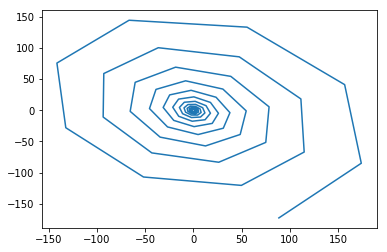

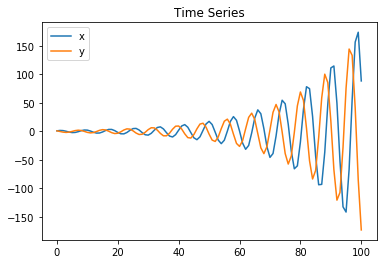

In [2]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

def run_trial(x,y,plot_series=True):
    x_result = [y]
    y_result = [x]
    for step in range(Steps):
        next_x = 0.9*x + 0.8*y
        next_y = -0.7*x + 0.6*y
        x = next_x
        y = next_y
        x_result.append(x)
        y_result.append(y)    
    plt.plot(x_result,y_result)
    plt.show()
    plt.plot(x_result,label='x')
    plt.plot(y_result,label='y')
    plt.title('Time Series')
    plt.legend()
    plt.show()


Steps = 100
start = 0
stop = -1

run_trial(1.0, 1.0,True)

We see that the system spirals out of control, with both x and y oscillating with increasing amplitude toward $\pm \infty$.

Optional - I ran many initial conditions and found this to be true for all of them. See below.

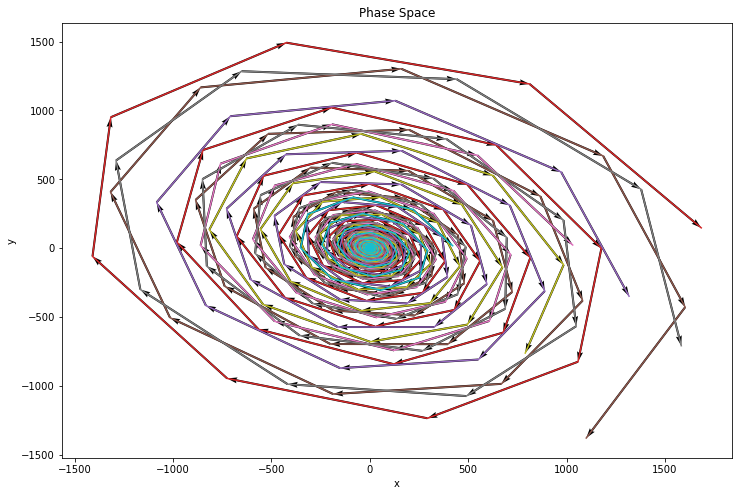

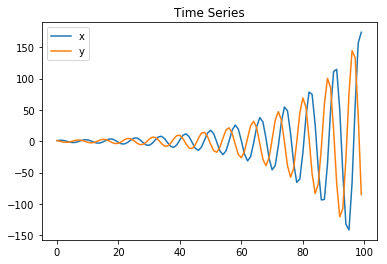

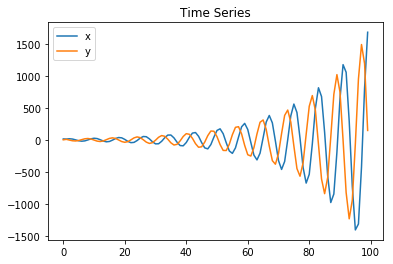

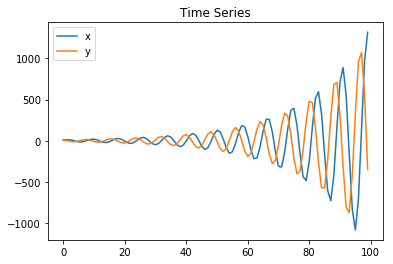

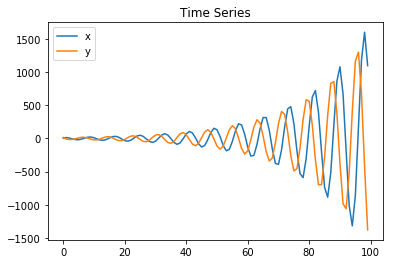

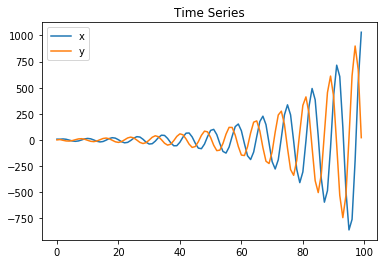

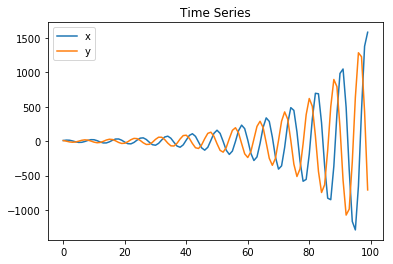

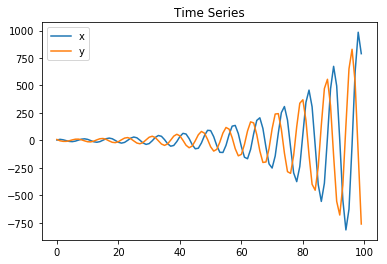

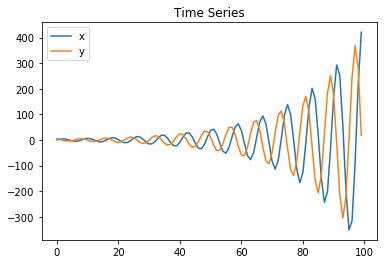

In [4]:
### Everything below here is optional.  I wanted to explore more about this system.

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

def run_trial(x,y,plot_series=True):
    x_result = [y]
    y_result = [x]
    for step in range(Steps):
        next_x = 0.9*x + 0.8*y
        next_y = -0.7*x + 0.6*y
        x = next_x
        y = next_y
        x_result.append(x)
        y_result.append(y)    
    x_result = np.array(x_result[start:stop])
    y_result = np.array(y_result[start:stop])
    x_tail = x_result[:-1]
    x_head = x_result[1:]
    y_tail = y_result[:-1]
    y_head = y_result[1:]
    dx = x_head - x_tail
    dy = y_head - y_tail
    phase_ax.plot(x_result,y_result)
    phase_ax.quiver(x_tail, y_tail, dx, dy, scale_units='xy', angles='xy', scale=1, width = 0.003)
    
    if(plot_series == True):
        series_fig = plt.figure()
        series_ax = series_fig.gca()
        series_ax.plot(x_result,label='x')
        series_ax.plot(y_result,label='y')
        series_ax.set_title('Time Series')
        series_ax.legend()

Steps = 100
start = 0
stop = -1

phase_fig = plt.figure(figsize=(12,8))
phase_ax = phase_fig.gca()
phase_ax.set_title('Phase Space')
phase_ax.set_xlabel('x')
phase_ax.set_ylabel('y')

run_trial(1.0, 1.0,True)
run_trial(1.0, 0.0,False)
run_trial(0.0, 1.0,False)

for _ in range(7):
    [x,y] = np.random.rand(2)*20
    run_trial(x,y,True)

plt.show()

3) (computer) Read section 4.5 in Sayama's book

https://textbooks.opensuny.org/introduction-to-the-modeling-and-analysis-of-complex-systems/

Do exercise 4.9 on p.54 with the given values. Submit the plot of $x$ vs $t$ as we did in class and briefly describe and interpret what you see.  Do each part in its own code cell and write the discussion in a "Markdown" type cell directly below the plot it describes.  You will copy-paste the same code each time, changing just the necessary parameters.

In your for-loop, include the following lines to prevent negative values of $x$.  Reason - this is a common model for population growth so there can't be a a negative number of individuals.

    if x < 0:
        x = 0

$K=3.0$ for all parts.

A) $a = 1.0, x_0 = 2.0$

B) $a = 1.1, x_0 = 2.0$

C) $a = 3.0, x_0 = 2.0$

D) $a = 4.0, x_0 = 2.0$

E) $a = 1.9, x_0 = 5.0$

First, a comment.  I should have said:


if x < 0.001:
    x = 0

Some of you experience "floating point error on part d".  Your system crashes to essentially zero.  But you had a tiny tiny residual, like 0.000001.  Because it was not EXACTLY 0, your system "came back to life" later.  This should not have happened.

Lesson, when running simulations, your code should not depend on something being exactly equal to some specified value.  Better to set a "close enough tolerance" like x < 0.001, rather than x <= 0. 

A) Stable b/c a=1 means no net growth.  System reads $x_t = 1 x_{t-1}$.

B) $a=1.9$ produces slow, controlled growth up to carrying capacity K.  Stable thereafter.  

C) Larger $a=3.0$ causes the system to overshoots K at first. Then overcorrects, going below.  Then overcorrects again.  Etc.  However, the magnitude of the overcorrection decreases over time and the systems slowly settles into equilibrium at K.

D) $a=4.0$ is too large - population grows too fast at first.  Population then "consumes all available resources" needed for survival too fast and entirely dies off before that resource can regrow.  Extinction.  Note, this happens even though initial population is below carrying capacity $K$.

E) $a=1.9$ is small enough to allow stabilty.  But the inital population is too high this time and it dips dangerouly year in year 1.  Luckily, some individuals survive and population grows slowly back to K.  However, if we run $a=1.9$ and $x=7.0$, this inital drop is too severe - entire population dies off in year 1, leading to extinction.

a = 1.0, x_0 = 2.0


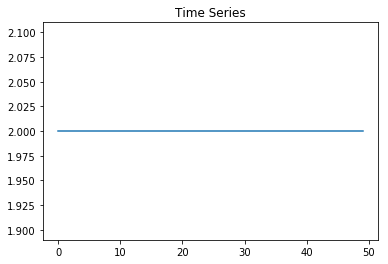

a = 1.1, x_0 = 2.0


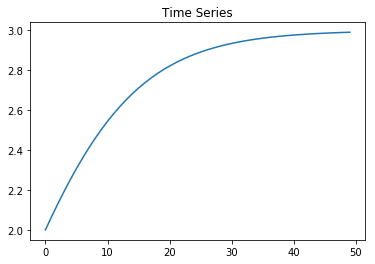

a = 3.0, x_0 = 2.0


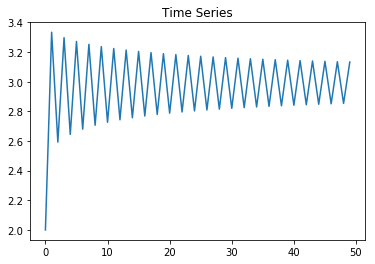

a = 4.0, x_0 = 2.0


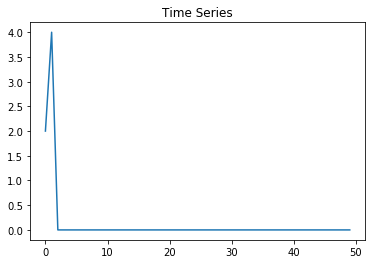

a = 1.9, x_0 = 5.0


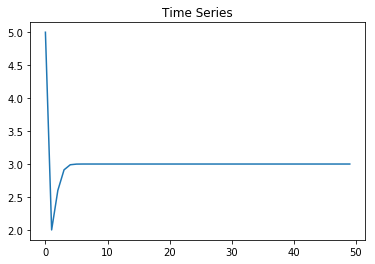

a = 1.9, x_0 = 6.0


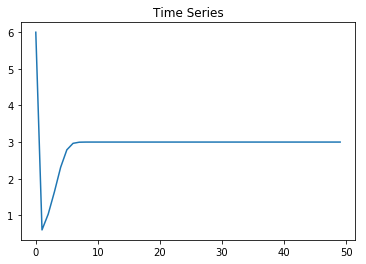

a = 1.9, x_0 = 7.0


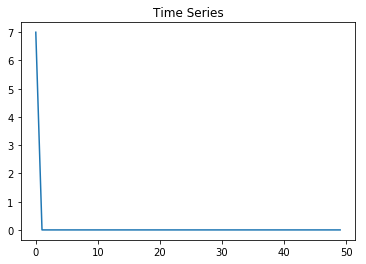

a = 2.0


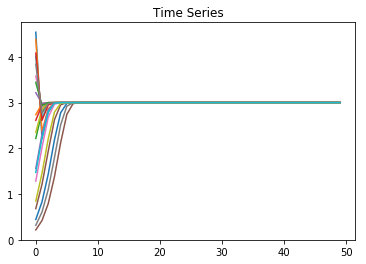

a = 2.1


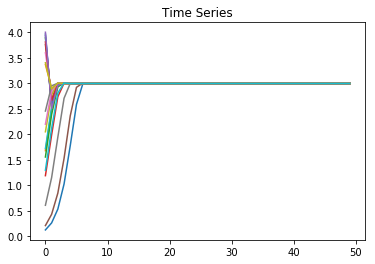

a = 2.2


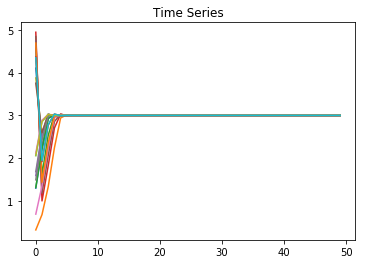

a = 2.3


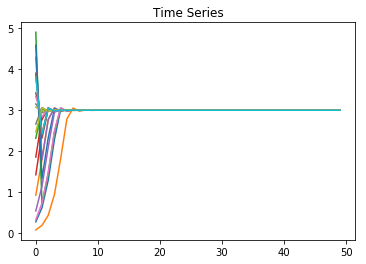

a = 2.5


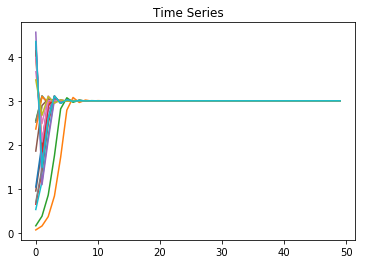

a = 2.6


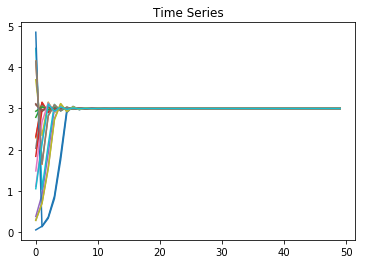

a = 2.7


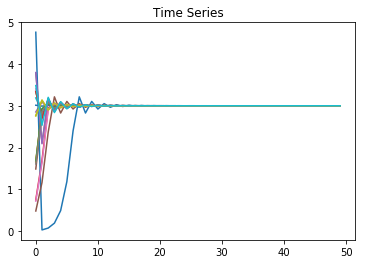

a = 2.8


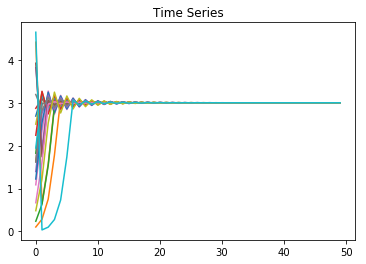

a = 2.9


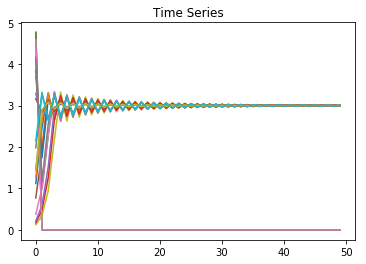

a = 3.0


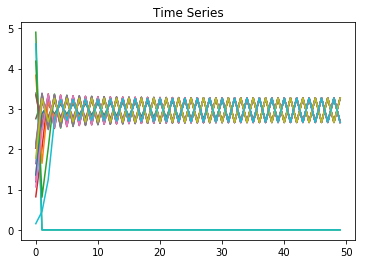

a = 3.2


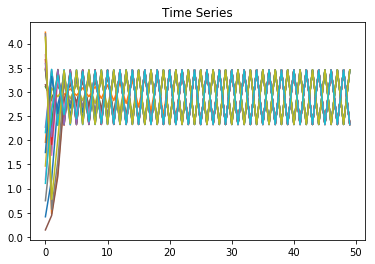

a = 3.3


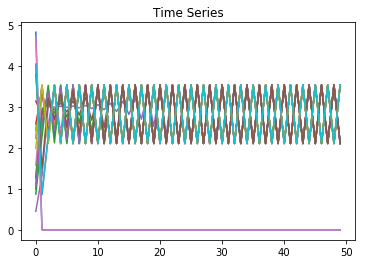

a = 3.4


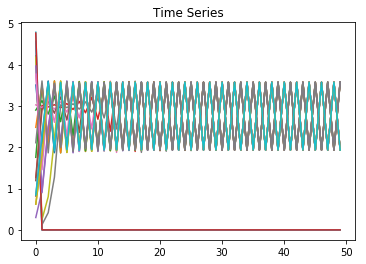

a = 3.5


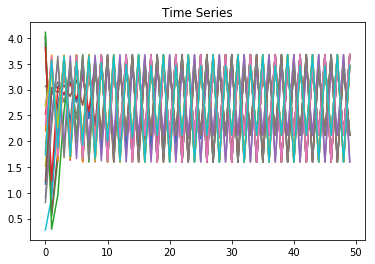

a = 3.6


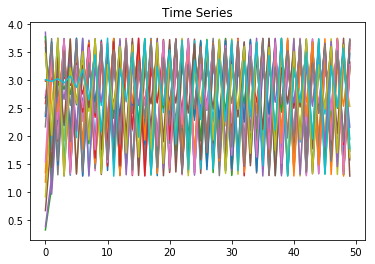

a = 3.7


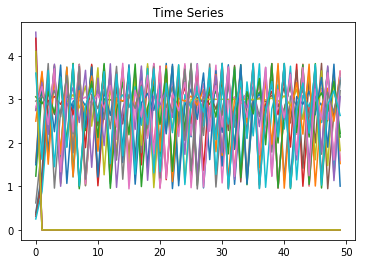

a = 3.9


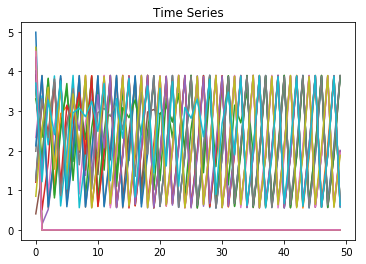

a = 4.0


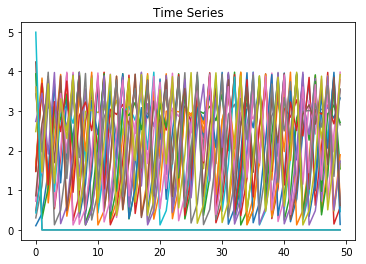

a = 4.1


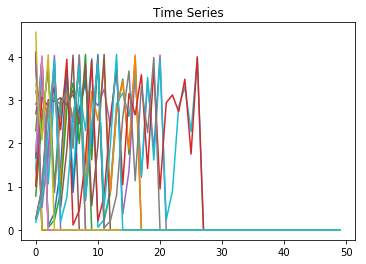

a = 4.2


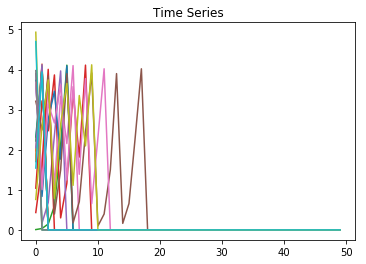

In [7]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

def run_trial(x0,plot_series=True):
    x = x0
    x_result = [x]
    for step in range(Steps):
        x = f(x)
        if(x < 0.001):
            x = 0
        x_result.append(x)
    x_result = np.array(x_result[start:stop])
    
    if(plot_series == True):
        series_ax.plot(x_result)#,label='x0='+str(x0))
        series_ax.set_title('Time Series')
        
K = 3.0
def f(x):
    return (a-(a-1)/K*x)*x
#     r = a - 1.0
#     return x + r*x*(1-x/K)

Steps = 50
start = 0
stop = -1

a = 1.0
x = 2.0
print("a = %.1f, x_0 = %.1f"%(a,x))
series_fig = plt.figure()
series_ax = series_fig.gca()
run_trial(x,True)
plt.show()

a = 1.1
x = 2.0
print("a = %.1f, x_0 = %.1f"%(a,x))
series_fig = plt.figure()
series_ax = series_fig.gca()
run_trial(x,True)
plt.show()

a = 3.0
x = 2.0
print("a = %.1f, x_0 = %.1f"%(a,x))
series_fig = plt.figure()
series_ax = series_fig.gca()
run_trial(x,True)
plt.show()

a = 4.0
x = 2.0
print("a = %.1f, x_0 = %.1f"%(a,x))
series_fig = plt.figure()
series_ax = series_fig.gca()
run_trial(x,True)
plt.show()

a = 1.9
x = 5.0
print("a = %.1f, x_0 = %.1f"%(a,x))
series_fig = plt.figure()
series_ax = series_fig.gca()
run_trial(x,True)
plt.show()

### Everything below here is optional.  I wanted to explore more about this system.

a = 1.9
x = 6.0
print("a = %.1f, x_0 = %.1f"%(a,x))
series_fig = plt.figure()
series_ax = series_fig.gca()
run_trial(x,True)
plt.show()


a = 1.9
x = 7.0
print("a = %.1f, x_0 = %.1f"%(a,x))
series_fig = plt.figure()
series_ax = series_fig.gca()
run_trial(x,True)
plt.show()


for a in np.linspace(2.0,4.2,20):
    print("a = %.1f"%a)
    series_fig = plt.figure()
    series_ax = series_fig.gca()
    for x in np.linspace(0.1*K, 0.9*K, 20):
#     for _ in range(10):
        x = np.random.rand()*5
        run_trial(x,True)
    plt.show()

plt.show()